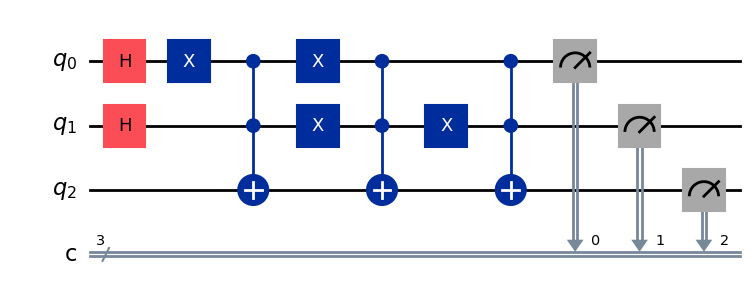

In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Quantum circuit
qc = QuantumCircuit(3, 3)

# Prepare inputs
qc.h(0)  # |+>
qc.h(1)  # |+>

# Quantum OR gate
qc.x(0)
qc.ccx(0, 1, 2)
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
qc.ccx(0, 1, 2)

qc.measure([0, 1, 2], [0, 1, 2])

qc.draw(output="mpl", idle_wires=False, style="iqp")

In [2]:
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="...",
                               )
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_osaka'

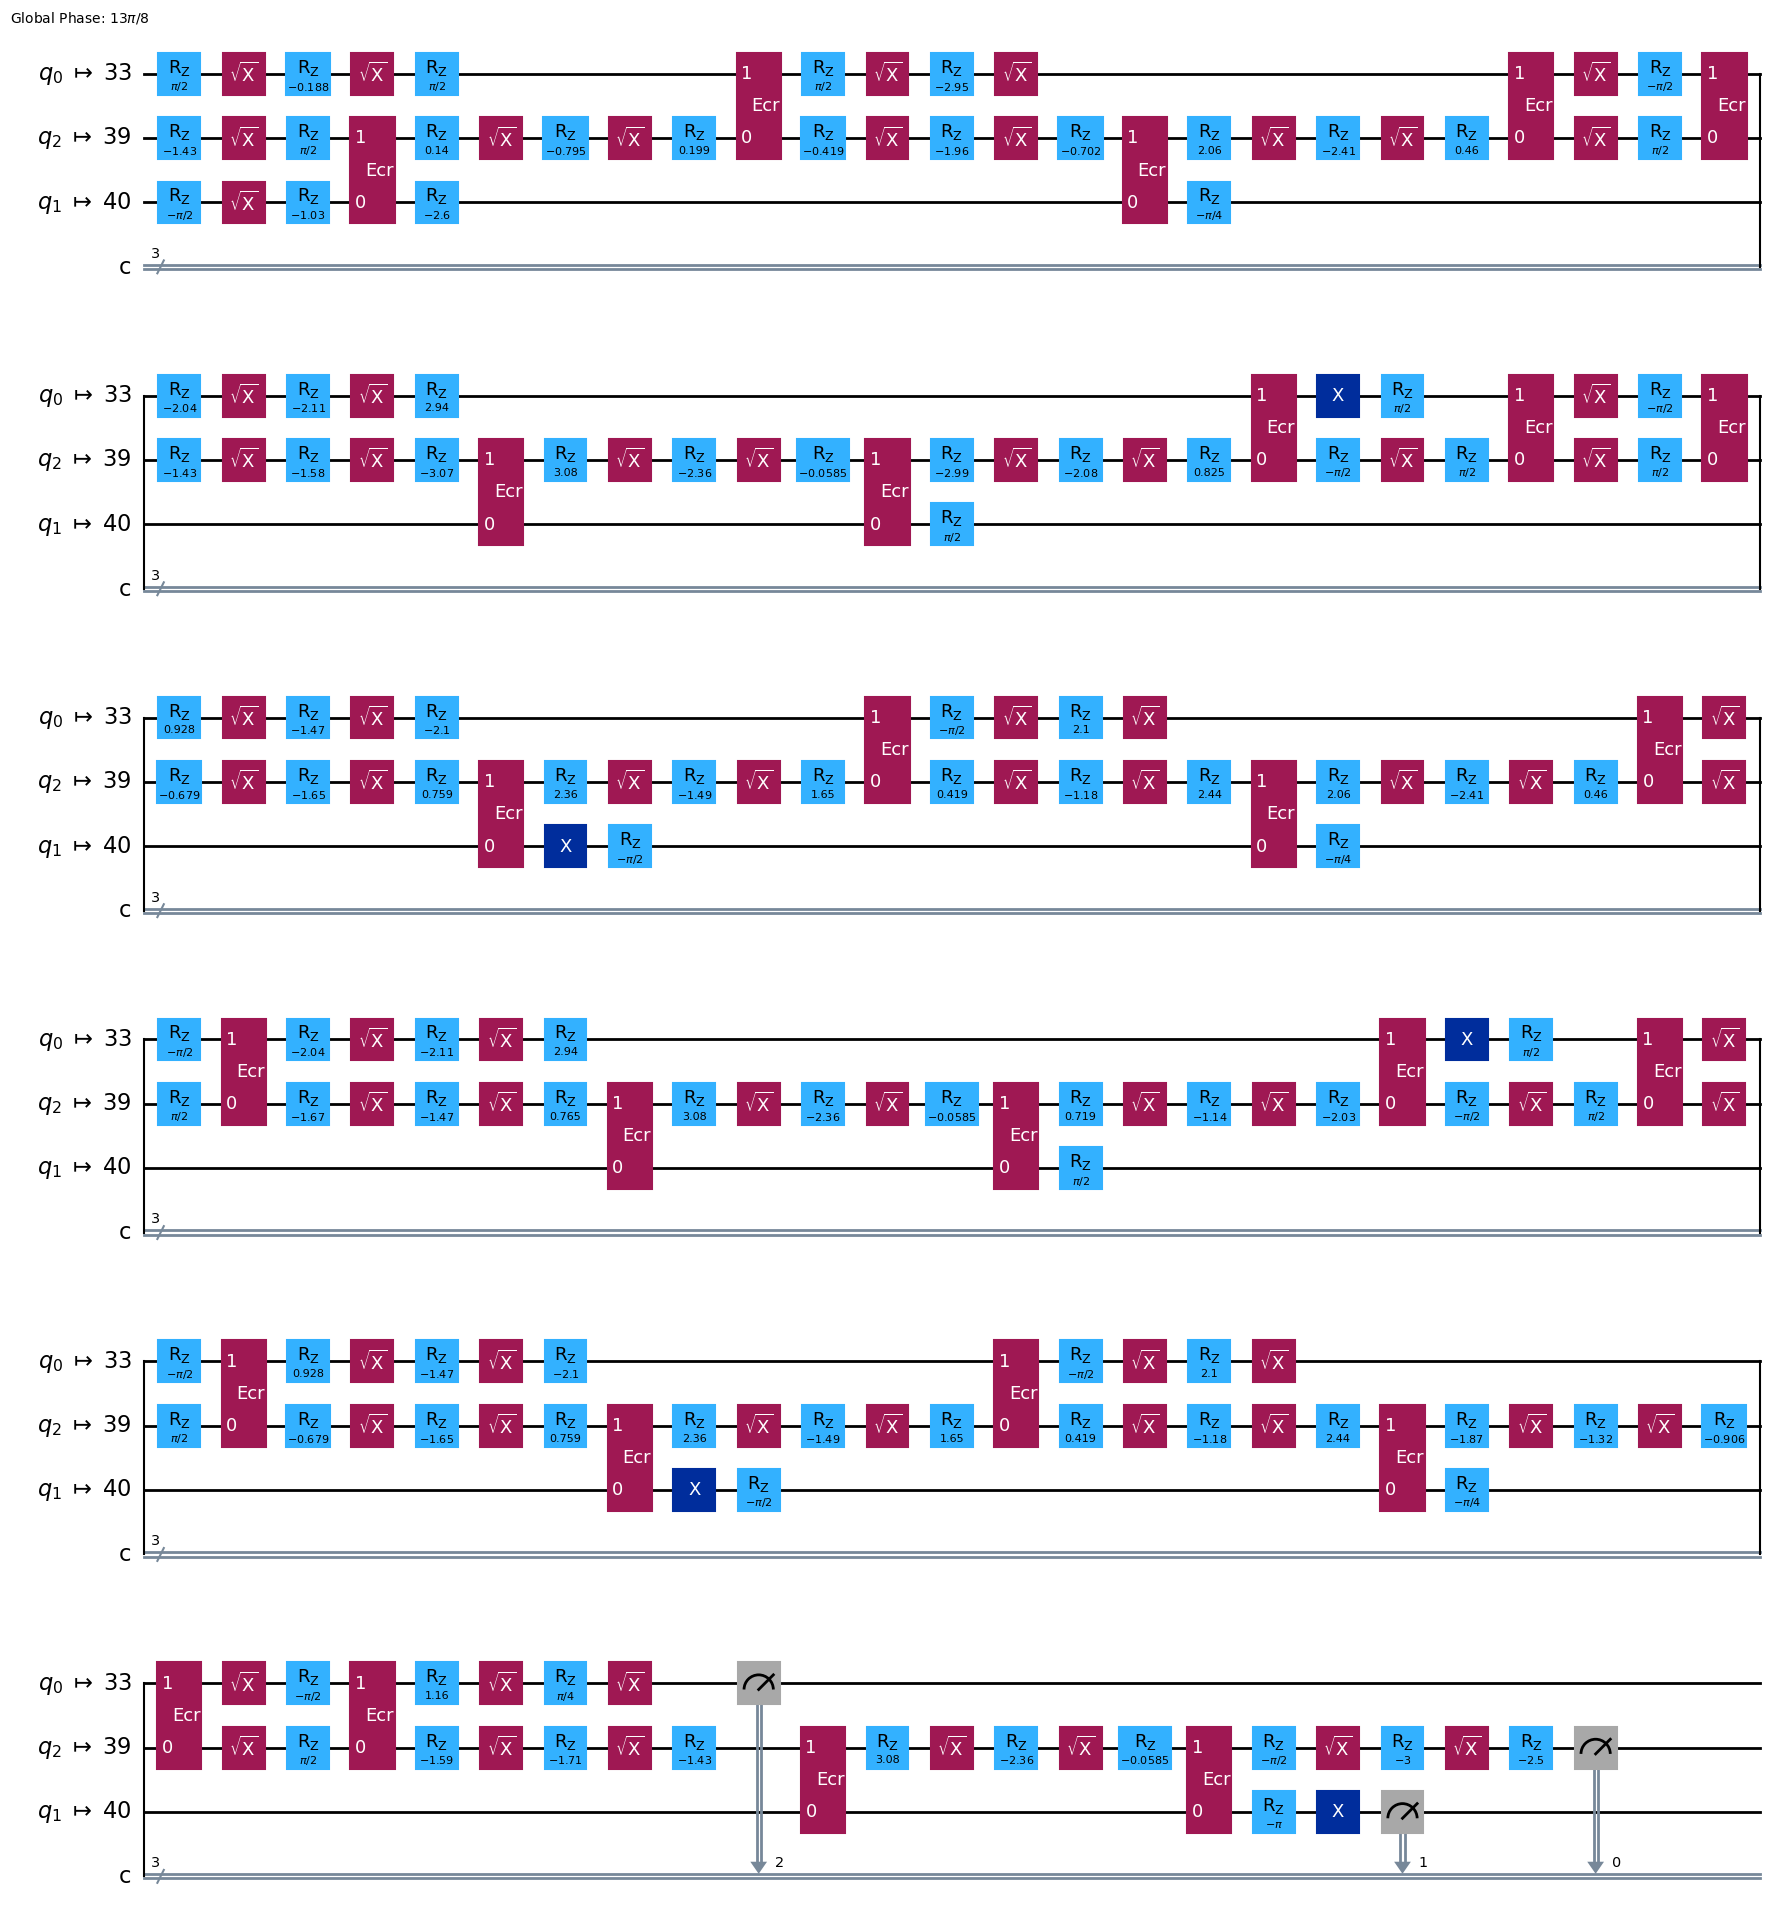

In [3]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

In [4]:
job = backend.run(isa_circuit)
result = job.result()

In [5]:
# Get the counts
counts = result.get_counts(isa_circuit)
print("counts: ", counts)

counts:  {'111': 573, '100': 234, '110': 780, '011': 205, '101': 886, '001': 266, '010': 349, '000': 707}


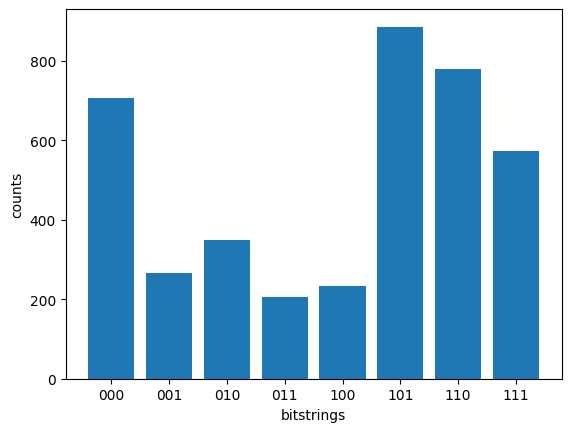

In [7]:
import matplotlib.pyplot as plt

# Sort keys for consistency
counts = dict(sorted(counts.items()))

plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')
plt.show()

In [8]:
# Note that Qiskit uses MSB to the left notation, e.g. 110 is 011 in the notation we used in the post.
counts2 = {key[::-1]: val for key, val in counts.items()}
counts2 = dict(sorted(counts2.items()))

# See also https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features
# for migration from older Qiskit versions

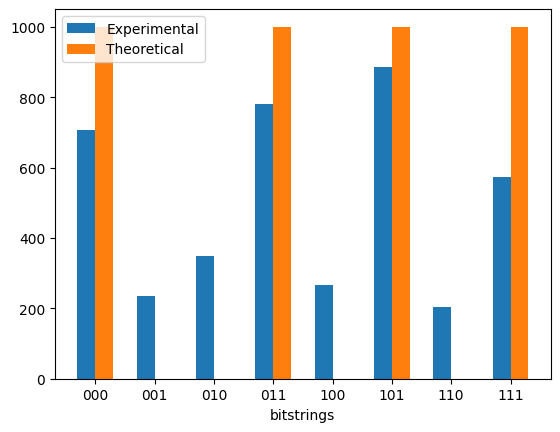

In [9]:
theoretical_counts =  {'101': 1000, '111': 1000, '000': 1000, '100': 0, '010': 0, '011': 1000, '001': 0, '110': 0}
theoretical_counts = dict(sorted(theoretical_counts.items()))

import numpy as np
plt.bar(np.array(range(8)) - 0.15, counts2.values(), 0.3, color='tab:blue', label='Experimental')
plt.bar(np.array(range(8)) + 0.15, theoretical_counts.values(), 0.3, color='tab:orange', label='Theoretical')
plt.xticks(range(8), counts.keys())
plt.xlabel('bitstrings')
plt.legend()
plt.savefig('fig2.png')
plt.show()